# Analysis of the Faster raw data

tau = 2.748522±0.26 µs


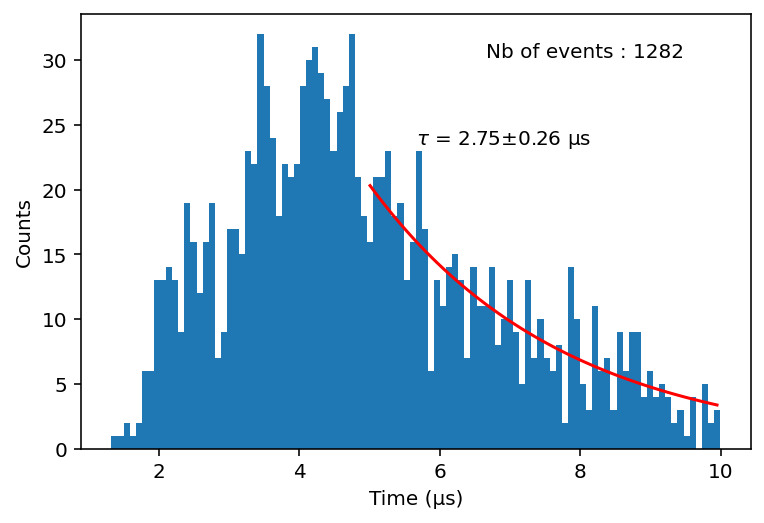

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from scipy.optimize import curve_fit
from muon_software.faster_to_python import faster_formatting
from muon_software.TAC import TAC
from muon_software.utils import exp
file = 'data/FASTER_TSCA_acquisition_15h30.txt'

measured_times = faster_formatting(file)

final_delays = TAC(measured_times, TAC_range=10_000)*1e-3 # Convert to µs

n, bins, _ = plt.hist(final_delays, bins=100)
bins_centers = (bins[1:] + bins[:-1])/2

# Fit the exp on the histogram
mask = (bins_centers > 5) 
x = bins_centers[mask]
y = n[mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 5])
perr = np.sqrt(np.diag(pcov))
print(f'tau = {popt[1]:2f}±{perr[1]:.2f} µs')

plt.plot(x, exp(x, *popt), 'r-')
plt.text(0.5, 0.7, f'$\\tau$ = {popt[1]:.2f}±{perr[1]:.2f} µs', transform=plt.gca().transAxes)

plt.text(0.9, 0.9, f'Nb of events : {len(final_delays)}', transform=plt.gca().transAxes, ha='right')
plt.xlabel('Time (µs)')
plt.ylabel('Counts');

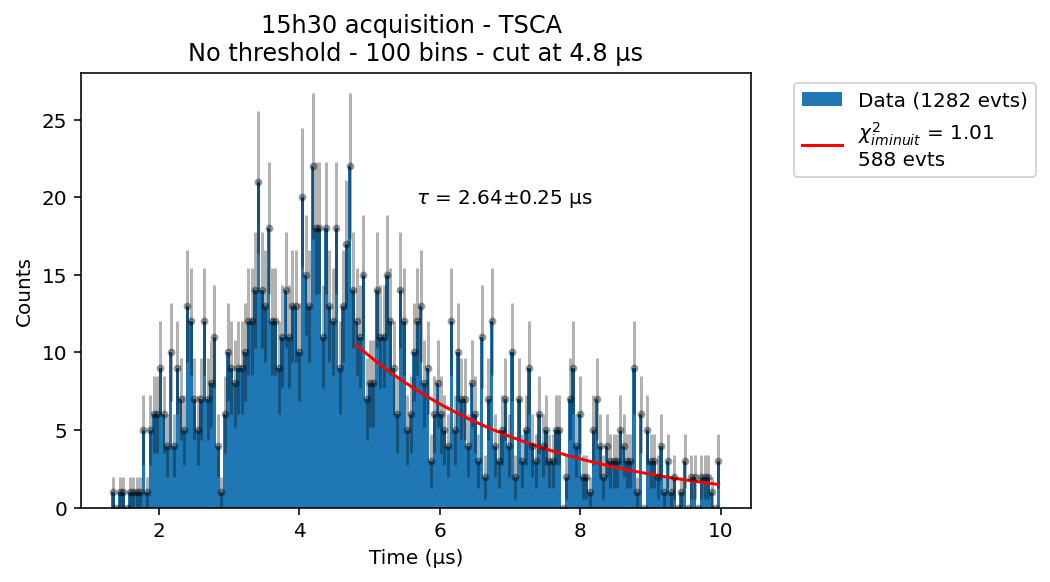

In [34]:
from muon_software.analysis import muon_lifetime
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_TSCA_acquisition_15h30.txt' #'data/FASTER_anode_acquisition_1h40.txt'

Object = muon_lifetime(file, time_unit='ns')

Object.trigger(threshold=0)

delay = Object.TAC(bins=180)

popt, perr = Object.exp_fit(x_cut = 4.8, method='iminuit')

fig, ax = Object.plot_final_results()
ax.set_title('15h30 acquisition - TSCA \nNo threshold - 100 bins - cut at 4.8 µs');

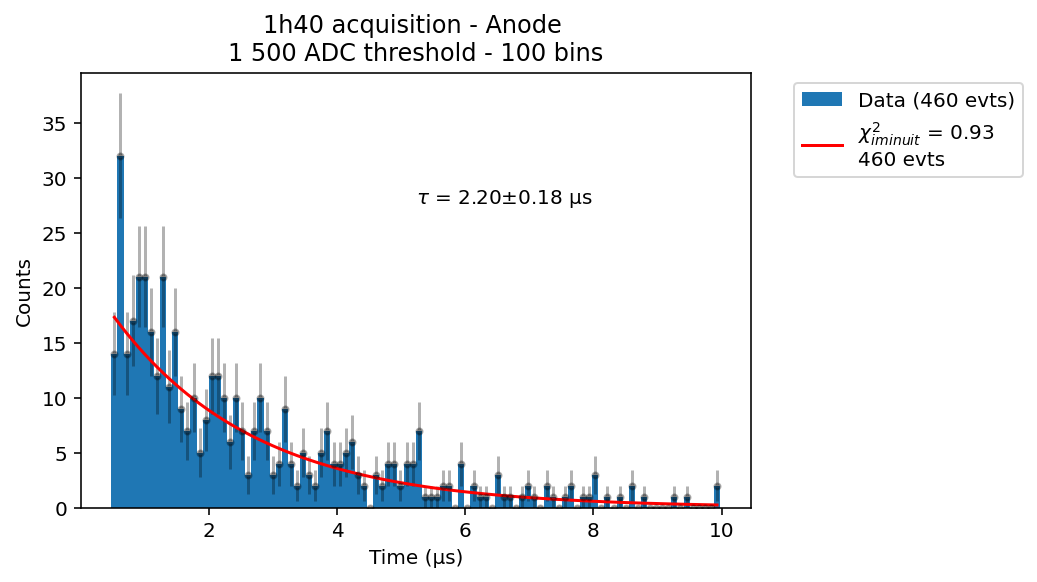

In [51]:
from muon_software.analysis import muon_lifetime
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_anode_acquisition_1h40.txt'

Object = muon_lifetime(file, time_unit='ns')

Object.trigger(threshold=1_500)

delay = Object.TAC(bins=100)

popt, perr = Object.exp_fit(x_cut = 0, method='iminuit') 

fig, ax = Object.plot_final_results(bins=100)
ax.set_title('1h40 acquisition - Anode \n1 500 ADC threshold - 100 bins');

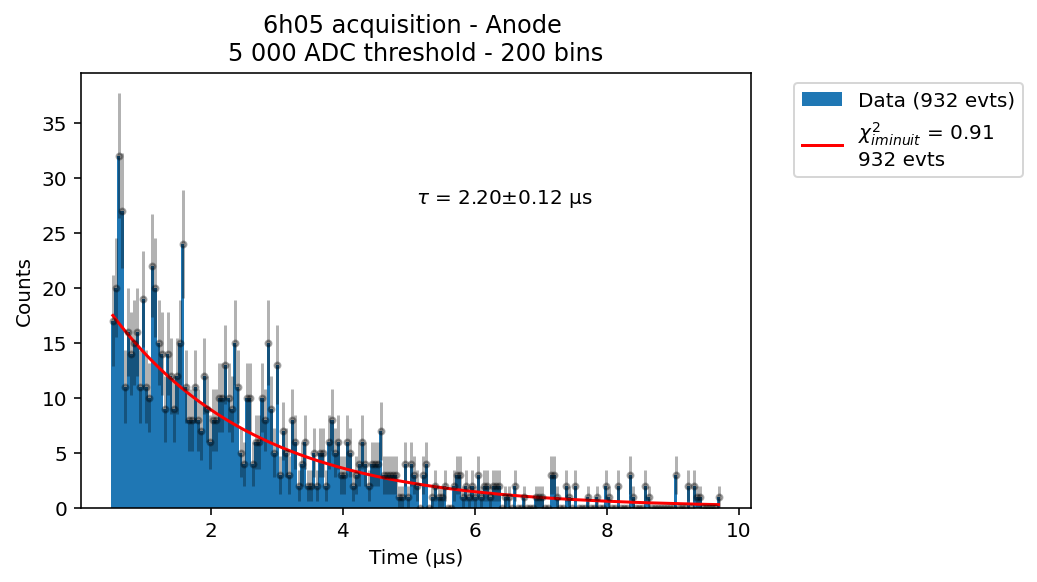

In [39]:
import matplotlib.pyplot as plt
from muon_software.analysis import muon_lifetime
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_anode_acquisition_morning_6h05.txt'

Object = muon_lifetime(file, time_unit='ns')

Object.trigger(mode='manual', threshold=5_000)

delay = Object.TAC(bins=200)

popt, perr = Object.exp_fit(x_cut = 0, method='iminuit') 

fig, ax = Object.plot_final_results(bins=200);
ax.set_title('6h05 acquisition - Anode \n5 000 ADC threshold - 200 bins');

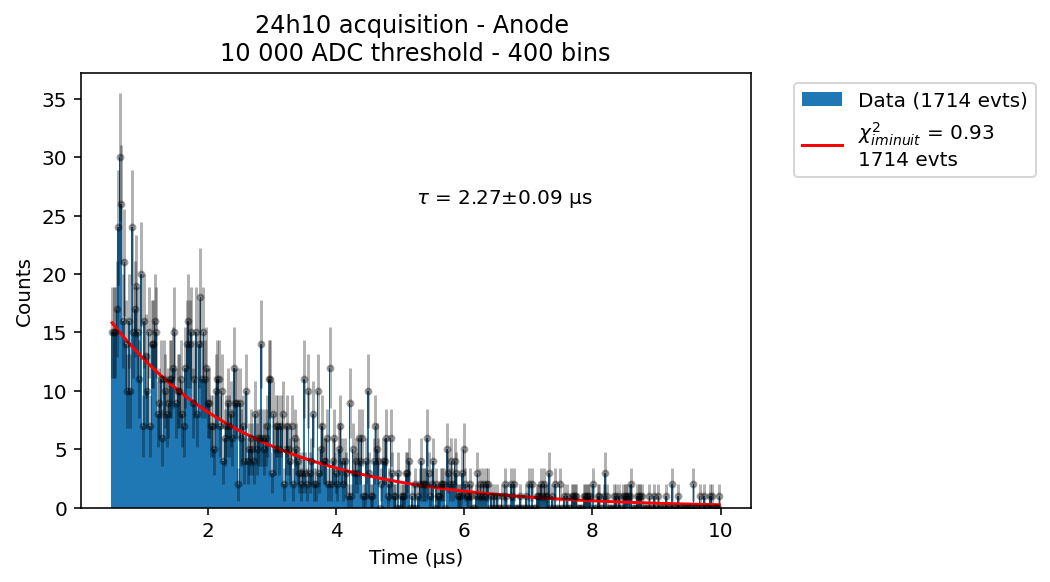

In [40]:
import matplotlib.pyplot as plt
from muon_software.analysis import muon_lifetime
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_anode_acquisition_morning_24h10.txt'

Object = muon_lifetime(file, time_unit='ns')

Object.trigger(mode='manual', threshold=10_000)

delay = Object.TAC(bins=400)

popt, perr = Object.exp_fit(x_cut = 0, method='iminuit') 

fig, ax = Object.plot_final_results(bins=400)
ax.set_title('24h10 acquisition - Anode \n10 000 ADC threshold - 400 bins');

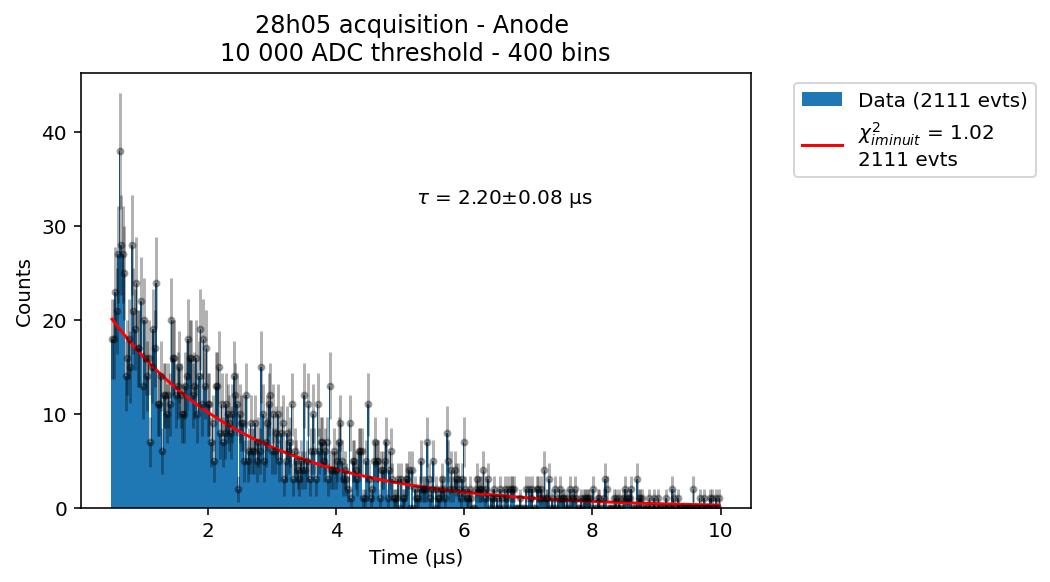

In [7]:
import matplotlib.pyplot as plt
from muon_software.analysis import muon_lifetime
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_anode_acquisition_morning_28h05.txt'

Object = muon_lifetime(file, time_unit='ns')

Object.trigger(mode='manual', threshold=10_000)

delay = Object.TAC(bins=400)

popt, perr = Object.exp_fit(x_cut = 0, method='iminuit') 

fig, ax = Object.plot_final_results(bins=400)
ax.set_title('28h05 acquisition - Anode \n10 000 ADC threshold - 400 bins');

## How do we trigger to filter the noise ?

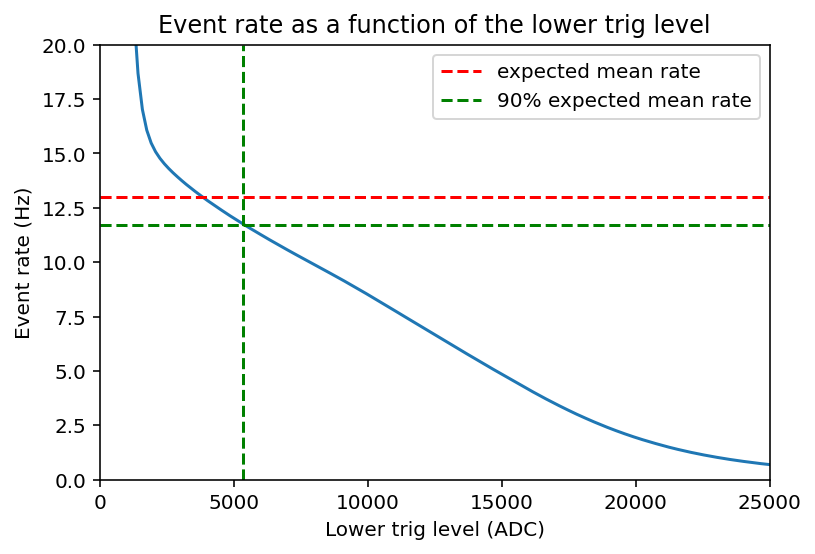

In [1]:
from muon_software.analysis import muon_lifetime
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
file = 'data/FASTER_anode_acquisition_morning_24h10.txt'

Object = muon_lifetime(file, time_unit='ns')

adc_range = np.linspace(np.min(Object.values), np.max(Object.values), 1000)

Counts = []

time = (24*60+10)*60

for i in range(len(adc_range)):
    n = len(np.where(Object.values > adc_range[i])[0])
    Counts.append(n/time)

# Get the x value where the counts is 90% of the max
x = np.where(np.array(Counts) > 13*0.9)[0][-1]

plt.plot(adc_range, Counts)
plt.axhline(13, color='r', ls='--', label="expected mean rate") # 13 events by second in 1h40
plt.axhline(13*0.9, color='g', ls='--', label="90% expected mean rate") # 13 events by second in 1h40
plt.axvline(adc_range[x], color='g', ls='--') # 13 events by second in 1h40
plt.xlim(0, 25000)
plt.ylim(0, 20)
plt.legend()
plt.xlabel('Lower trig level (ADC)')
plt.ylabel('Event rate (Hz)')
plt.title('Event rate as a function of the lower trig level')
plt.gcf().set_facecolor('white');

# Determine the best fit start and best binning in regards to the $\chi^2$

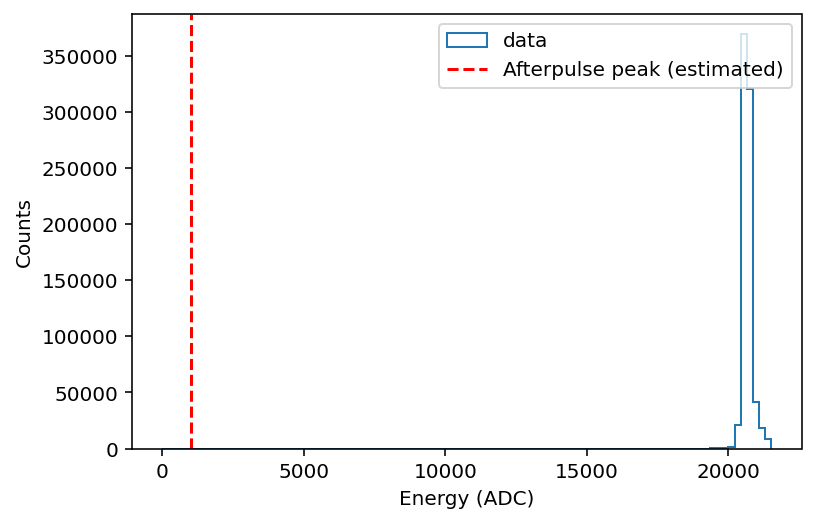

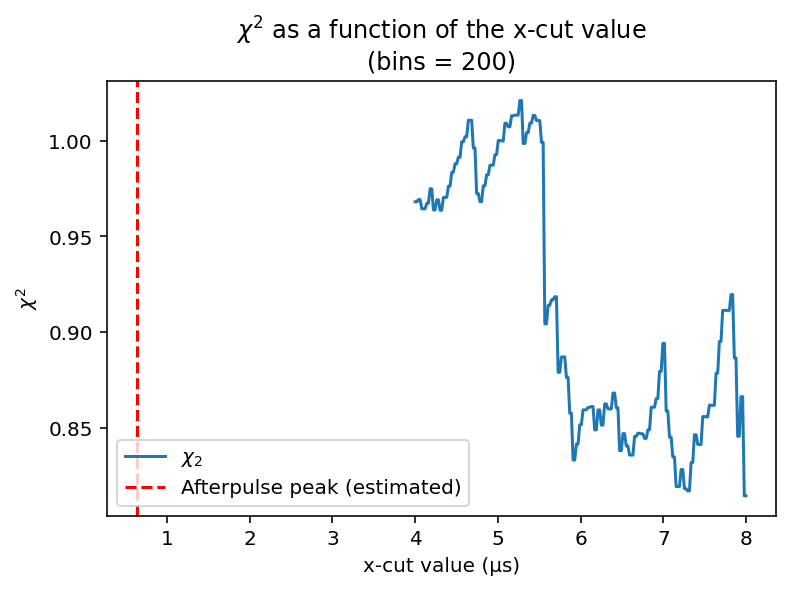

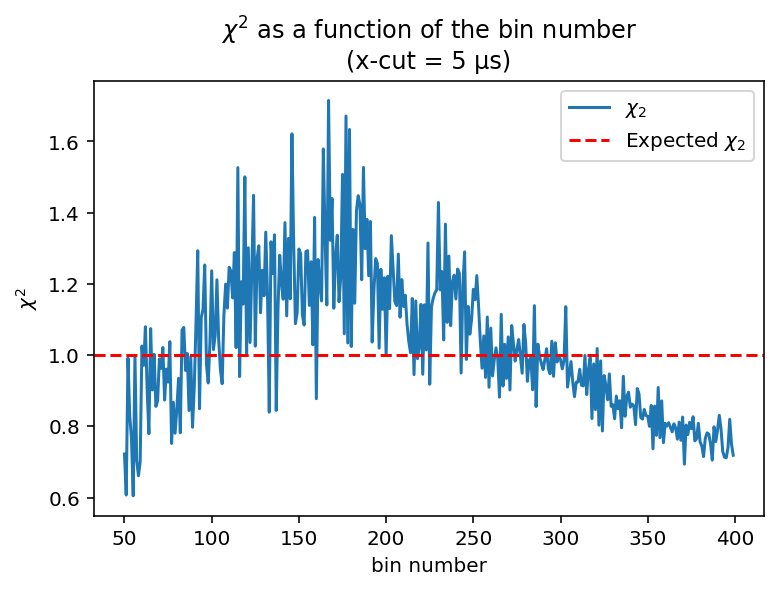

In [20]:
import numpy as np
from muon_software.analysis import muon_lifetime
from muon_software.plots import energy_plot, x_cut_plot, bin_plot
file = 'data/FASTER_TSCA_acquisition_15h30.txt'
Object = muon_lifetime(file, time_unit='ns')

energy_plot(Object) # Plot the energy spectrum to see if the trig is good (and the afterpulse peak)

Object.trigger(threshold=0) 

x_cut_plot(Object, x_cut_list=np.linspace(4, 8, 200), bins=200) # Plot the x_cut plot to see if the x_cut is good

bin_plot(Object, bins_list=np.arange(50, 400, 1), x_cut=5); # Plot the bin plot to see if the bin is good

# Get all the $\tau$ values with their error bars

In [35]:
import numpy as np
from muon_software.analysis import muon_lifetime

files = ['data/FASTER_TSCA_acquisition_15h30.txt', 
         'data/FASTER_anode_acquisition_1h40.txt', 
         'data/FASTER_anode_acquisition_morning_6h05.txt',
         'data/FASTER_anode_acquisition_morning_24h10.txt',
         'data/FASTER_anode_acquisition_morning_28h05.txt']
method = ['TSCA output (588 evts)', 
          'Anode output (±10V range, 460 evts)', 
          'Anode output (±5V range, 932 evts)',
          'Anode output (±5V range, 1714 evts)',
          'Anode output (±5V range, 2111 evts)']
x_cut_list = [4.8, 0, 0, 0, 0]
bins_list = [180, 100, 200, 400, 400]
threshold_list = [0, 1_500, 5_000, 10_000, 10_000]

tau = []
tau_err = []
chi2 = []

stored_values = 'data/muon_lifetime_num.npy'
do_all = True # To do all the files that have already been computed

# First, load the stored values
if do_all:
    dic = {} #np.load(stored_values, allow_pickle=True)
    dic['files'] = []
    dic['method'] = []
    dic['tau'] = []
    dic['tau_err'] = []
    dic['chi2'] = []

for i, file in enumerate(files):
    if do_all or file not in dic['files']:
        print(f"Reading file {file}")
        Object = muon_lifetime(file, time_unit='ns')

        Object.trigger(mode='manual', threshold=threshold_list[i]) 
        
        delay = Object.TAC(bins=bins_list[i])

        Object.exp_fit(x_cut = x_cut_list[i], method='iminuit') 
        
        tau.append(Object.tau)
        tau_err.append(Object.tau_err)
        chi2.append(Object.chi2)
        
        dic['files'].append(file)
        dic['method'].append(method[i])
        dic['tau'].append(Object.tau)
        dic['tau_err'].append(Object.tau_err)
        dic['chi2'].append(Object.chi2)

# Save the new values
np.save(stored_values, dic)

Reading file data/FASTER_TSCA_acquisition_15h30.txt
Reading file data/FASTER_anode_acquisition_1h40.txt
Reading file data/FASTER_anode_acquisition_morning_6h05.txt
Reading file data/FASTER_anode_acquisition_morning_24h10.txt
Reading file data/FASTER_anode_acquisition_morning_28h05.txt


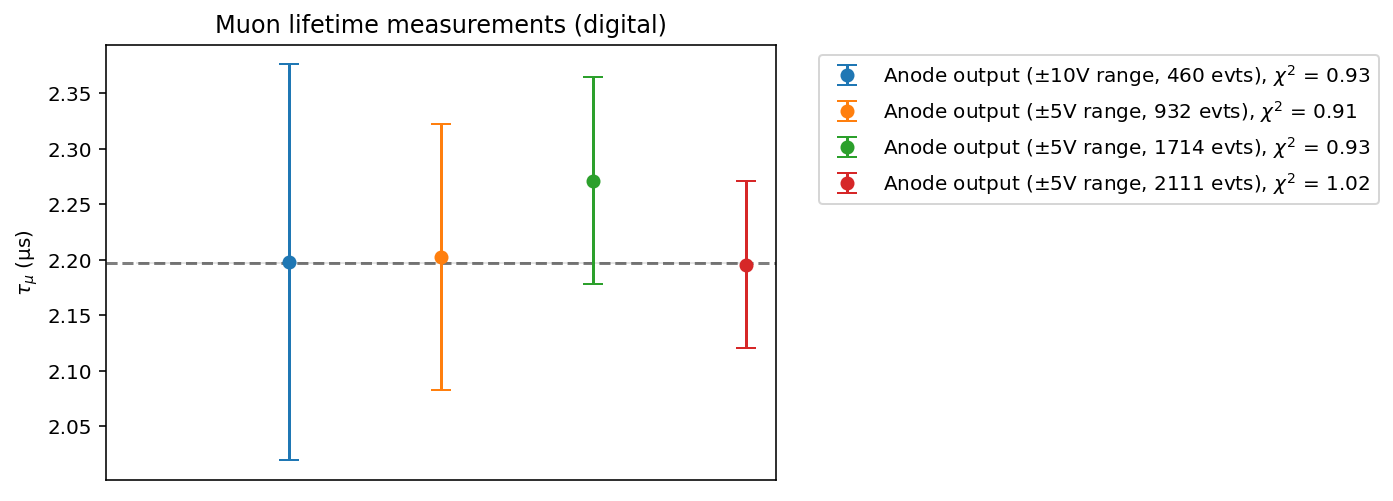

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
    
dic = np.load('data/muon_lifetime_num.npy', allow_pickle=True).item()
tau = dic['tau']
tau_err = dic['tau_err']
chi2 = dic['chi2']
method = dic['method']

th_value = 2.197
th_err = 2.2e-6
x_axis = np.linspace(0, 1, len(tau))  
plt.axhline(th_value, ls='--', c='k', alpha=0.5)
plt.fill_between(x_axis, th_value-th_err, th_value+th_err, color='k', alpha=0.1)

for i in range(1, len(tau)):
    label = method[i] + f", $\chi^2$ = {chi2[i]:.2f}"
    eb = plt.errorbar(x_axis[i], tau[i], yerr=tau_err[i], marker='o', ls='none', capsize=5, label=label)
    # eb[-1][0].set_linestyle('--') # Modify error bars linestyle

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel(f'$\\tau_µ$ (µs)')
plt.title('Muon lifetime measurements (digital)')
plt.gca().get_xaxis().set_visible(False)
plt.gcf().set_facecolor('white')
plt.savefig('images/numerical_analysis/muon_lifetime.png', dpi=300, bbox_inches='tight');